# The Closed-Economy, IS-MP Model
By: LJ Valencia

This note illustrates how to code a closed-economy IS-MP model in Python. First, I outline the IS-MP model and how to derive the Aggregate Demand (AD) curve. This note is based from *Short-Run Fluctuations* by Romer (2018). I also demonstrate how object-oriented programming (OOP), which is essential to Python programming, can be used for coding economic models.

[Quant Econ](https://quantecon.org/) and [Macro with Python](https://www.ncachanosky.com/macro_python/#:~:text=Macro%20with%20Python%20is%20a,familiarity%20with%20intermediate%20macroeconomic%20models.) are useful resources that informed me in writing this notebook.

## Table of Contents
- [The IS Curve](#IS)
- [The MP Curve](#MP)
- [The Equilibrium](#EQ)
- [The Aggregate Demand Curve](#AD)

## The IS Curve <a name="IS"></a>

The IS (Investment-Savings) Curve equation is obtained via the goods market equilibrium where output, $Y$ is a function of spending: 

$$output = f(spending)$$

$$Y = C + I + G$$

Since this is a closed-economy model, net exports are ignored. The set of equations below define the components of $Y$.

The consumption function is a Keynesian consumption function: 

$$(eq.1) \quad C = \bar{C} + mpc(Y-T)$$

where $\bar{C}$ is the level of autonomous consumption, $\bar{C}\geq0$. $mpc$ is the marginal propensity to consume, $0< mpc < 1$. 

Next, assume that the investment is a linear function: 

$$(eq.2) \quad I = \bar{I} - di$$

where $\bar{I}$ is the intercept when $i = 0$. $d$ represents sensitivity of Investment is to increases in the real interest rate, $i$, note that $i\geq0$. 

Note that $T=\bar{T}$ and $G=\bar{G}$ and are therefore, exogenous. Then, we obtain the IS curve by substituting $(eq.1)$, $(eq.2)$, $\bar{T}$, and $\bar{G}$ into the equilibrium condition and solving for $Y$:

$$Y = \bar{C} + \alpha(Y-T) + \bar{I} - di + \bar{G}$$

$$Y = \dfrac{1}{1-\alpha}(\bar{C} + \bar{I} - \alpha \bar{T} - di + \bar{G})$$

In order to plot the IS curve, I solved for $i$ from the equilibrium condition:

$$(eq.3) \quad  i_{IS} = \dfrac{(\bar{C} + \bar{I} - \alpha \bar{T} + \bar{G})}{d}-\dfrac{Y(1-\alpha)}{d}$$

To implement the plotting of the IS curve, I created a class containing the parameters as class attributes. The `IS_params` class' properties and methods (if there are any) are inherited by the `IS_curve` class. `r_array_IS` in the `IS_curve` class encapsulates $eq. 3$. Similar class-based approaches are used for solving and plotting the MP curve. This [link](https://www.programiz.com/python-programming/inheritance) from programiz provides some useful high-level information on class inheritances. 

Note that the `super` function under the class constructor in `IS_curve` class provides access to the methods and properties of the parent/sibiling class. This [page](https://www.programiz.com/python-programming/methods/built-in/super) provides a brief explanation on the `super` function.

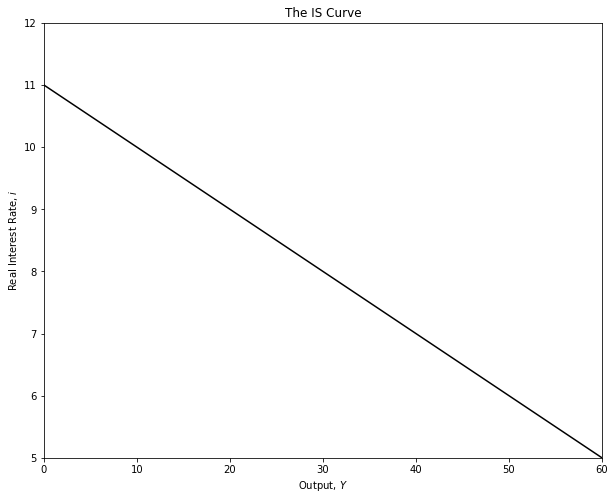

In [82]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

"1. IS Curve"
Y_max = 100 # max level of output
Y = np.arange(Y_max+1) # Numpy array for Y; output

class IS_params:
    """
    IS_params class contains instance attributes that will feed into the IS_curve class;
    - parameters of the model are defined as class attributes
    """
    t = 10 # tax level
    mpc = 0.5 # mpc: marginal propensity to consume
    c_bar = 25 # c_bar: autonomous consumption
    i_bar = 25 # i_bar: investment when i = 0
    g = 10 # g: government expenditures
    d = 5 # d: interest rate sensitivity of Investment (i)
        
class IS_curve(IS_params):
    """
    IS curve class contains calculation for arrays to plot the IS curve;
    """
    def __init__(self):
        super().__init__()
        # validates if mpc is a valid value;
        if 0 < self.mpc < 1:
            pass
        else:
            raise ValueError("The mpc parameter must be between 0 and 1.")
            
    def i_array_IS(self, Y=0):
        """
        Calculates array of real interest rates (y-axis in plot);
        """
        i_IS = ((self.c_bar + self.i_bar - self.mpc*self.t + self.g) - (Y*(1-self.mpc)))/self.d
        return i_IS

    def y_lv_IS(self, i=0):
        """
        Solves for level of Y given level of real interest rate;
        """
        y_lv = (self.c_bar + self.i_bar - (self.mpc*self.t) + (self.d*i) + self.g)/(1-self.mpc)
        return y_lv
    
    def _plot(self):
        """
        This method plots the IS curve
        """
        i_IS = self.i_array_IS(self.Y) # call i_arrays to obtain real interest rate array for plotting;
        y_max = np.max(i_IS+1) # max level of real interest rate in re-arranged IS equation plus 1;
        x_max = np.max(self.Y*0.6) # obtain max level of Y;
        axes_range = [0, x_max, 0+5, y_max] # axes range
        fig, ax = plt.subplots(figsize=(10, 8)) 
        ax.set(title="The IS Curve", xlabel=r'Output, $Y$', ylabel=r'Real Interest Rate, $i$')
        ax.plot(self.Y, i_IS, "k-")
        ax.axis(axes_range)
        
IS_params.Y = Y # create a class attribute of Y within IS_params class;
IS = IS_curve() # create instance of IS_curve class;

IS._plot() # call _plot method;

## The MP Curve <a name="MP"></a>

The MP (Monetary Policy) curve is a function that is increasing in output, $Y$ and inflation, $\pi$.

$$(eq.4) \quad i_{MP} = i(Y, \pi)$$

This means that the central bank increases the real interest rate in response to a rise in output and/or inflation. The MP curve follows a re-arranged Fisher equation with a simplified Taylor rule, plus an intercept term, $\bar{a}$:

$$(eq.5) \quad i_{MP} = \bar{a} + r^{Taylor}$$

Where:

$$r^{Taylor} = \gamma + \bar{n}_{Y}Y + \bar{n}_{\pi}\pi$$

$\bar{n}_{\pi}$ is the central bank's responsiveness to inflation, $0< \bar{n}_{\pi} < 1$. $\bar{n}_{Y}$ is the central bank responsiveness to the level of output, $0< \bar{n}_{Y}< 1$. Lastly, $\gamma$ is the marginal product of capital, $0< \gamma< 1$.

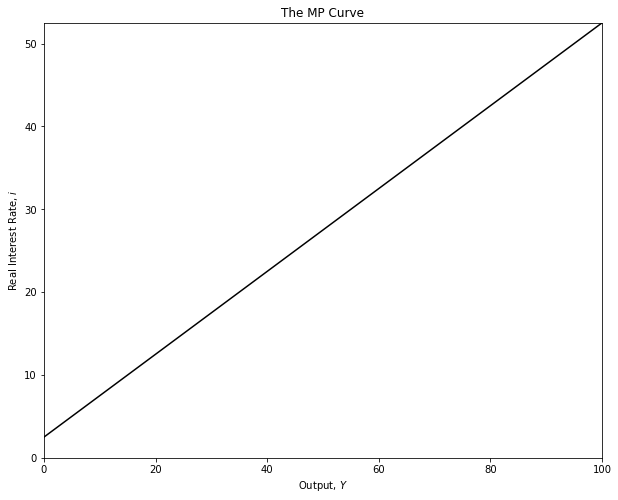

In [17]:
"2. MP Curve"
# set parameters
Y_max = 100 # max level of output
Y = np.arange(Y_max+1) # Numpy array for Y

class MP_params:
    """
    MP_params class contains instance attributes that will feed into the MP_curve class;
    - parameters of the model are defined as class attributes
    """
    a = 1 # a: intercept term
    gamma = 0.5 # gamma: marginal product of capital
    n_y = 0.5 # n_y: policymaker response to the level of Y
    n_pi = 0.5 # n_pi: policymaker response to the level of pi
    pi = 2 # pi: inflation
    
class MP_curve(MP_params):
    """
    IS curve class contains calculation for arrays to plot the IS curve;
    """
    def __init__(self):
        super().__init__()
        # raise a ValueError if n is not between zero and one;
        if 0 < self.n_y < 1:
            pass
        else:
            raise ValueError("n_y must be between 0 and 1.")
        # raise a ValueError if n_pi is not between zero and one;
        if 0 < self.n_pi < 1:
            pass
        else:
            raise ValueError("n_pi must be between 0 and 1.")
            
    def i_array_MP(self, pi=0, Y=0):
        """
        Calculates array of real interest rates (y-axis in plot);
        """
        i_MP = self.a + (self.gamma + self.n_y*(Y) + self.n_pi*(pi))
        return i_MP
    
    def y_lv_MP(self, i=0):
        """
        Solves for level of Y given level of real interest rate;
        """
        y_lv = -1*(self.a + self.gamma + self.n_pi*(self.pi) - i)/self.n_y
        return y_lv
    
    def _plot(self):
        """
        This method plots the MP curve
        """
        i_MP = self.i_array_MP(self.pi, self.Y) # call i_arrays to obtain real interest rate array for plotting;
        y_max = np.max(i_MP) # max level of real interest rate in re-arranged MP equation;
        x_max = np.max(self.Y) # obtain max level of Y;
        axes_range = [0, x_max, 0, y_max] # axes range
        fig, ax = plt.subplots(figsize=(10, 8)) 
        ax.set(title="The MP Curve", xlabel=r'Output, $Y$', ylabel=r'Real Interest Rate, $i$')
        ax.plot(self.Y, i_MP, "k-")
        ax.axis(axes_range)

MP_params.Y = Y # create a class attribute of Y within MP_params class;
MP = MP_curve() # create instance of MP_curve class;
MP._plot() # call _plot method;

# The Equilibrium <a name="EQ"></a>

The equilibrium in the IS-MP model is the occurs when:

$$i_{MP}=i_{IS}$$

At the equilibrium, planned expenditure equals output. In addition, the central bank is choosing the interest rate in accordance to the policy rule. $Y^{*}$ is determined by inserting the IS and MP formulas in $i_{MP}=i_{IS}$ and solving for $Y$.

$$(eq.6) \quad i_{MP}=i_{IS}$$

$$\bar{a} + \gamma + \bar{n}_{Y}Y + \bar{n}_{\pi}\pi=\dfrac{(\bar{C} + \bar{I} - \alpha \bar{T} + \bar{G})}{d}-\dfrac{Y(1-\alpha)}{d}$$

$$\bar{n}_{Y}Y + \dfrac{Y(1-\alpha)}{d} =\dfrac{(\bar{C} + \bar{I} - \alpha \bar{T} + \bar{G})}{d}-\bar{n}_{\pi}\pi-\bar{a} -\gamma$$

$$Y(\bar{n}_{Y} + \dfrac{(1-\alpha)}{d}) =\dfrac{(\bar{C} + \bar{I} - \alpha \bar{T} + \bar{G})}{d}-\bar{n}_{\pi}\pi-\bar{a} -\gamma$$

$$(eq.7) \quad Y^{*} =\dfrac{\dfrac{(\bar{C} + \bar{I} - \alpha \bar{T} + \bar{G})}{d}-\bar{n}_{\pi}\pi-\bar{a} -\gamma}{(\bar{n}_{Y} + \dfrac{(1-\alpha)}{d})}$$

The equilibrium real interest rate is then solved by inserting $Y^{*}$ into the MP curve equation.

$$i^{*} = \bar{a} + \gamma + \bar{n}_{Y}Y^{*} + \bar{n}_{\pi}\pi$$

$$(eq.8) \quad i^{*} = \bar{a} + \gamma + \bar{n}_{Y}\dfrac{\dfrac{(\bar{C} + \bar{I} - \alpha \bar{T} + \bar{G})}{d}-\bar{n}_{\pi}\pi-\bar{a} -\gamma}{(\bar{n}_{Y} + \dfrac{(1-\alpha)}{d})} + \bar{n}_{\pi}\pi$$

I wrote a class, `IS_MP` which inherits the properties of `IS_curve` and `MP_curve`. This is an example of multiple inheritance (see this [page](https://www.programiz.com/python-programming/multiple-inheritance) for more information on multiple inheritances). The methods, `calculate_optimal_Y` and  `calculate_optimal_i` are based from $(eq.7)$ and $(eq.8)$ respectively.

Optimal Y and i are: 14.17 and 9.58


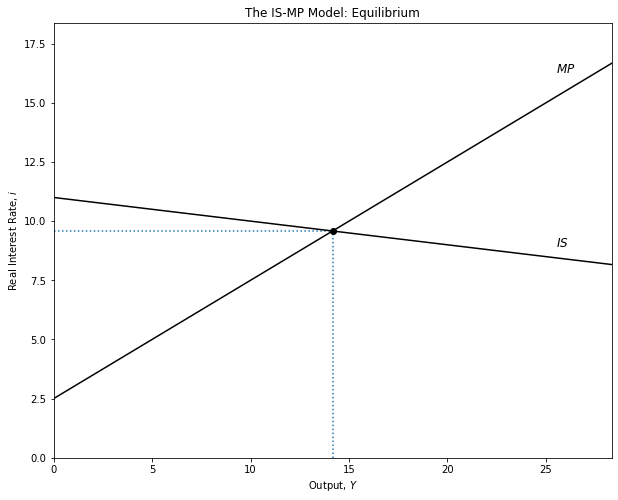

In [102]:
"3. IS-MP Equilibrium"

class IS_MP(IS_curve, MP_curve):
    """
    This class inherits the IS and MP curve classes and their respective properties
    """
    def __init__(self):
        super().__init__()
    
    def calculate_optimal_Y(self, pi=0):
        """
        Calculates the optimal output
        """
        y_star = (((self.c_bar + self.i_bar - self.mpc*self.t + self.g)/self.d)-(self.n_pi*pi)-self.a-self.gamma)/(self.n_y + ((1-self.mpc)/self.d))
        return y_star
    
    def calculate_optimal_i(self, optimal_y=0, pi=0):
        """
        Calculates the optimal real interest rate
        """
        i_star = self.a + self.gamma + self.n_y*optimal_y + self.n_pi*pi
        return i_star 
    
    def _eqplottext(self, ax):
        """
        Plot text for the IS_MP equilibrium plot 
        - The equilibrium values are calculated in the eqplottext method as well.
        """
        y_eq = self.calculate_optimal_Y(self.pi) # calculate optimal output;
        i_eq = self.calculate_optimal_i(y_eq, self.pi) # calculate optimal real interest rate;
        print("Optimal Y and i are: " + str(np.round(y_eq, 2)) + " and " + str(np.round(i_eq, 2)))
    
        ax.text(y_eq*1.8, np.max(self.i_array_MP(self.pi, self.Y))*0.31, "$MP$", fontsize=12) # add text describing the MP curve
        ax.text(y_eq*1.8, np.max(self.i_array_MP(self.pi, self.Y))*0.17, "$IS$", fontsize=12) # add text describing the IS curve
        # add dotted lines to point to the equilibrium
        ax.vlines(x=y_eq,ymin=0,ymax=i_eq, color='tab:blue', linestyles='dotted')
        plt.hlines(y=i_eq, xmin=0, xmax=y_eq, color='tab:blue', linestyles='dotted')
        ax.plot(y_eq, i_eq,'ro',color='black') # a black dot for the equilibrium point
        
    def _eqplot(self):
        """
        Plot the IS_MP equilibrium
        """
        axes_range = [0, self.calculate_optimal_Y(self.pi)*2, 0, np.max(self.i_array_MP(self.pi, self.Y))*0.35]
        fig, ax = plt.subplots(figsize=(10, 8))
        ax.set(title="The IS-MP Model: Equilibrium", xlabel=r'Output, $Y$', ylabel=r'Real Interest Rate, $i$')
        ax.plot(self.Y, self.i_array_IS(self.Y), "k-") # call the r_array_IS to generate array of real interest rates for IS curve;
        ax.plot(self.Y, self.i_array_MP(self.pi, self.Y), "k-") # call the r_array_MP to generate array of real interest rates for MP curve;
        plt.axis(axes_range)
        self._eqplottext(ax)
        
IS_MP_eq = IS_MP() # create an instance of the IS_MP class;
# call the _eqplot method;
IS_MP_eq._eqplot()

# The Aggregate Demand Curve <a name="AD"></a>

The Aggregate Demand (AD) curve can be derived from the IS-MP curve. The AD curve is based on the movement of the MP curve along the IS curve. This occurs when the central bank responds to higher/lower inflation by increasing/decreasing the real interest rate. When the interest rate rises, the MP curve shifts upwards in response to the movement from $\pi_{0}$ to $\pi_{1}$. This results in the economy moving along the IS curve, causing a decline in output and results in a new equilibrium. 

To derive and plot the AD curve, I created a class (`AD_curve`) which inherits the properties and attributes of `IS_MP` class. The `AD_curve` class calculates different levels of optimal output given different levels of inflation and plots the resulting aggregate demand curve. Specifically on calculations, I used a list comprehension to calculate varying $Y^{*}$ given different values of $\pi$.

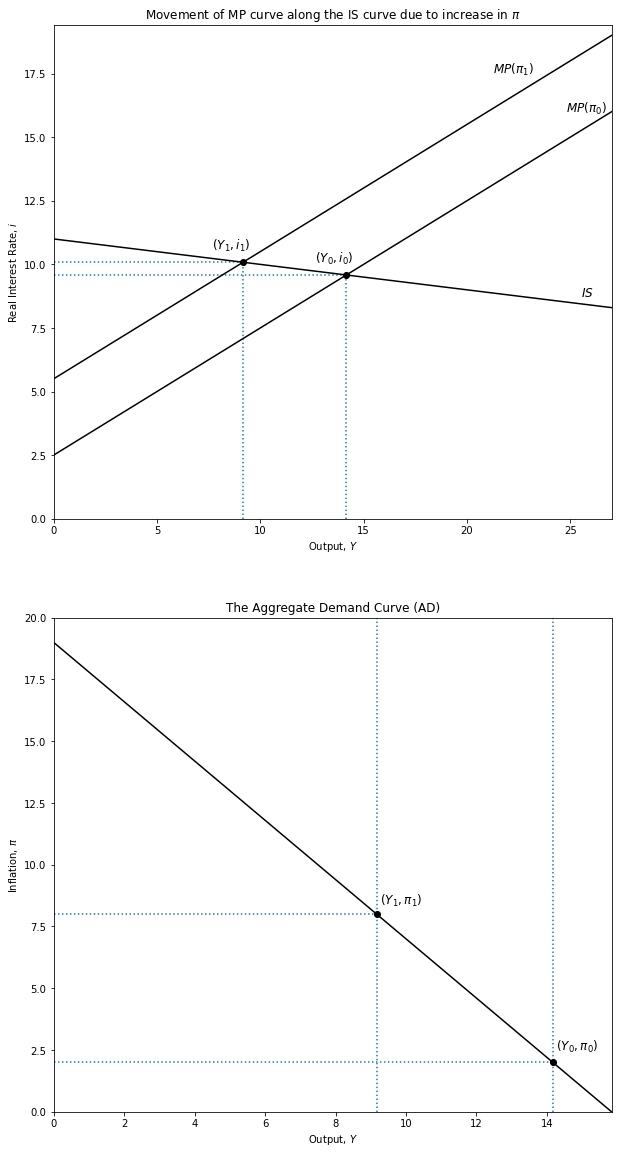

In [130]:
class AD_curve(IS_MP):
    """
    AD curve class calculates the arrays and plots the AD curve.
    """
    def __init__(self):
        super().__init__()
        
        self.pi_max = 20 # max inflation
        self.pi_array = np.arange(self.pi_max+1) # create a Numpy array for inflation
        # use list comprehension to calculate the optimal outputs given different inflation values
        self.ad_y = [self.calculate_optimal_Y(pi) for pi in self.pi_array] 
            
    def _plotAD(self):
        """
        Plots the AD curve
        """
        def _plotAD_MP_movement_labels(ax, pi_s: list, i_eqs: list, y_eqs: list):
            """
            Plot text for the equilibriums 
            """
            # add text describing the MP curve (at pi zero)
            ax.text(y_eqs[0]*1.75, np.max(self.i_array_MP())*0.31, "$MP(\pi_{0})$", fontsize=12) 
            # add text describing the MP curve (at pi one)
            ax.text(y_eqs[0]*1.5, np.max(self.i_array_MP())*0.34, "$MP(\pi_{1})$", fontsize=12) 
            ax.text(y_eqs[0]*1.8, np.max(self.i_array_MP())*0.17, "$IS$", fontsize=12) # add text describing the IS curve
            # add dotted lines to point to the equilibrium
            ax.vlines(x=y_eqs[0],ymin=0,ymax=i_eqs[0], color='tab:blue', linestyles='dotted')
            ax.hlines(y=i_eqs[0], xmin=0, xmax=y_eqs[0], color='tab:blue', linestyles='dotted')
            ax.vlines(x=y_eqs[1],ymin=0,ymax=i_eqs[1], color='tab:blue', linestyles='dotted')
            ax.hlines(y=i_eqs[1], xmin=0, xmax=y_eqs[1], color='tab:blue', linestyles='dotted')
            ax.plot(y_eqs[0], i_eqs[0],'ro',color='black') # a black dot for the equilibrium point (pi zero)
            ax.plot(y_eqs[1], i_eqs[1],'ro',color='black') # a black dot for the equilibrium point (pi one)
            ax.text(y_eqs[0]-1.5, i_eqs[0]*1.05, f'$(Y_{0}, i_{0})$', fontsize=12)
            ax.text(y_eqs[1]-1.5, i_eqs[1]*1.05, f'$(Y_{1}, i_{1})$', fontsize=12)
        
        def _plotAD_curve_labels(ax, pi_s: list, y_eqs: list):
            """
            Plot text for AD curve
            """
            ax.vlines(x=y_eqs[0], ymin=0, ymax=self.pi_max, color='tab:blue', linestyles='dotted')
            ax.vlines(x=y_eqs[1], ymin=0, ymax=self.pi_max, color='tab:blue', linestyles='dotted')
            ax.hlines(y=pi_s[0], xmin=0, xmax=y_eqs[0], color='tab:blue', linestyles='dotted')
            ax.hlines(y=pi_s[1], xmin=0, xmax=y_eqs[1], color='tab:blue', linestyles='dotted')
            ax.plot(y_eqs[0], pi_s[0],'ro',color='black') # a black dot
            ax.plot(y_eqs[1], pi_s[1],'ro',color='black') # a black dot (equilibrium at higher inflation value)
            ax.text(y_eqs[0]+0.1, pi_s[0]*1.25, f'$(Y_{0}, \pi_{0})$', fontsize=12)
            ax.text(y_eqs[1]+0.1,pi_s[1]*1.05, f'$(Y_{1}, \pi_{1})$', fontsize=12)

            
        new_pi = 8 # different lv. of inflation
        pi_s = [self.pi, new_pi] # create a list of the initial inflation and higher inflation
        # list comprehension to calculate equilibrum outputs
        y_eqs = [self.calculate_optimal_Y(i) for i in pi_s] 
        # list comprehension to calculate equilibrum real interest rates
        i_eqs = [self.calculate_optimal_i(y, pi) for y, pi in zip(y_eqs, pi_s)] 
        # plot the IS MP model for chart 1
        v_0 = [0, np.max(self.Y)*0.27, 0, np.max(self.i_array_MP(new_pi))*.35] # Set the axes range for chart 0
        fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 20))
        ax[0].set(title="Movement of MP curve along the IS curve due to increase in $\pi$", 
                  xlabel=r'Output, $Y$', 
                  ylabel=r'Real Interest Rate, $i$')
        # plot the movement of MP curves;
        ax[0].plot(self.Y, self.i_array_MP(self.pi), "k-") 
        ax[0].plot(self.Y, self.i_array_MP(new_pi), "k-")
        ax[0].plot(self.Y, self.i_array_IS(), "k-") # IS curve remains constant
        ax[0].axis(v_0) 
        _plotAD_MP_movement_labels(ax[0], pi_s, i_eqs, y_eqs) # add labels
        # plot AD curve for chart 2
        v_1 = [0, max(self.ad_y), 0, self.pi_max]
        ax[1].set(title="The Aggregate Demand Curve (AD)", 
                  xlabel=r'Output, $Y$', 
                  ylabel=r'Inflation, $\pi$')
        ax[1].plot(self.ad_y, self.pi_array, "k-")
        _plotAD_curve_labels(ax[1], pi_s, y_eqs)
        ax[1].axis(v_1) 
        
AD = AD_curve() # Call instance of AD curve
AD._plotAD() # call _plotAD to plot results